<a href="https://colab.research.google.com/github/Eserhimas/Basics/blob/main/ML_Basics_ROCAUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
x_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop/master/Chapter06/data/aps_failure_training_feats.csv'
y_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop/master/Chapter06/data/aps_failure_training_target.csv'

X = pd.read_csv(x_path)
y = pd.read_csv(y_path)

X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [31]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
59995,0
59996,0
59997,0
59998,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [12]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_test.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X_train.columns)

In [17]:
X_train.shape

(48000, 170)

In [15]:
model = keras.models.Sequential()

In [21]:
model.add(keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=8, activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=4, activation='relu'))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1, validation_split=0.2)

Epoch 1/100
1920/1920 [==============================] - 11s 4ms/step - loss: 0.1186 - accuracy: 0.9823 - val_loss: 0.0419 - val_accuracy: 0.9842
Epoch 2/100
1920/1920 [==============================] - 7s 4ms/step - loss: 0.0674 - accuracy: 0.9834 - val_loss: 0.0387 - val_accuracy: 0.9842
Epoch 3/100
1920/1920 [==============================] - 7s 4ms/step - loss: 0.0623 - accuracy: 0.9836 - val_loss: 0.0359 - val_accuracy: 0.9844
Epoch 4/100
1920/1920 [==============================] - 8s 4ms/step - loss: 0.0524 - accuracy: 0.9836 - val_loss: 0.0342 - val_accuracy: 0.9844
Epoch 5/100
1920/1920 [==============================] - 7s 4ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0320 - val_accuracy: 0.9849
Epoch 6/100
1920/1920 [==============================] - 8s 4ms/step - loss: 0.0464 - accuracy: 0.9846 - val_loss: 0.0338 - val_accuracy: 0.9845
Epoch 7/100
1920/1920 [==============================] - 7s 4ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.0326 - val_a

In [25]:
y_pred = model.predict(X_test)
y_pred_p=model.predict(X_test)
pred_classes=np.argmax(y_pred_p,axis=1)

375/375 [==============================] - 1s 2ms/step


In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p)

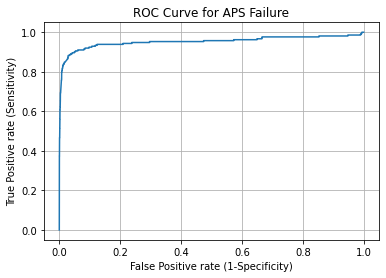

In [28]:
plt.plot(fpr,tpr)
plt.title("ROC Curve for APS Failure")
plt.xlabel("False Positive rate (1-Specificity)")
plt.ylabel("True Positive rate (Sensitivity)")
plt.grid(True)
plt.show()

In [30]:
roc_auc_score(y_test, y_pred_p)

0.9527367533980832